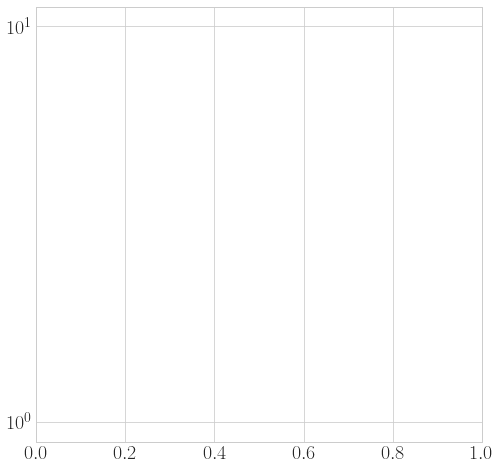

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

font = {'family' : 'Source Code Pro',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]=8,8
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-whitegrid')

In [2]:
def rg(w,D,J,Df,N):
    n = 2*np.pi*N*sqrt(D/Df)
    delta = -J**2 /(w - (D-Df)/2 + J/4)
    if J * (J + delta) <= 0:
        return 0
    else:
        return J+delta


In [30]:
def complete_rg(w, D0, J):
    x, y,z = [], [], []
    N = 100
    Df = D0/2
    den = w - (D0-Df)/2 + J/4
    count = N
    plt.title(r'$\omega={}, D={}, J={}$'.format(w,D0,J))
    for D in np.linspace(D0,0.1,N):
        if den * (w - (D-Df)/2 + J/4) <= 0 or J == 0:
            return x,y,z
        x.append(count)
        y.append(J)
        z.append(D)
        den = w - (D-Df)/2 + J/4
        J = rg(w, D, J, Df, N)
        count -= 1
    return x,y,z

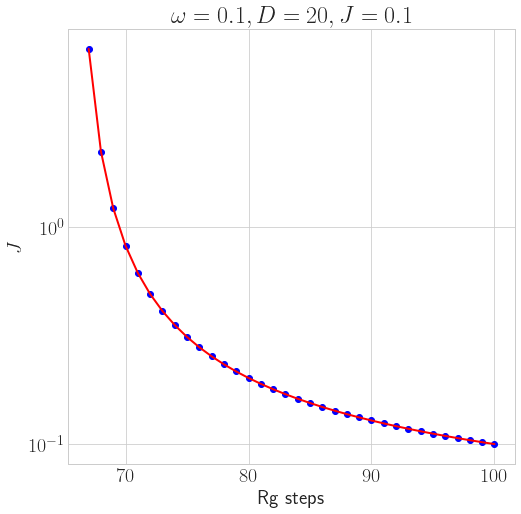

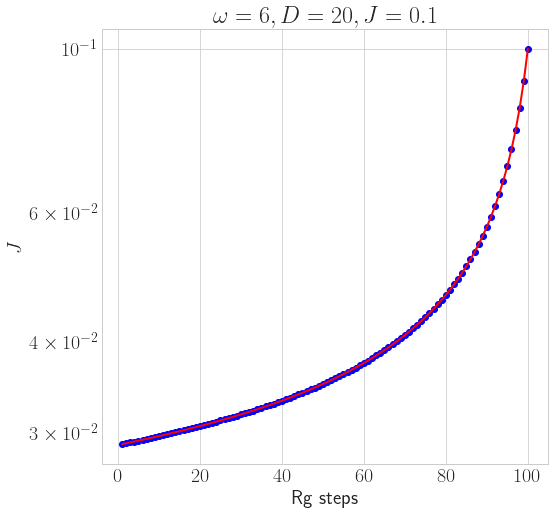

In [34]:
x, y = complete_rg(0.1, 20, 0.1)[:2]
plt.plot(x,y, color='r')
plt.scatter(x,y, color='b', marker="o")
plt.xlabel(r"Rg steps")
plt.ylabel(r"$J$")
plt.yscale("log")
plt.show()
x, y = complete_rg(6, 20, 0.1)[:2]
plt.plot(x,y, color='r')
plt.scatter(x,y, color='b', marker="o")
plt.xlabel(r"Rg steps")
plt.ylabel(r"$J$")
plt.yscale("log")
plt.show()

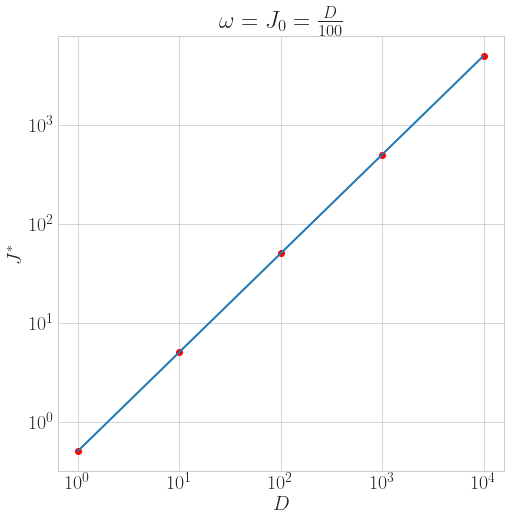

In [35]:
def JvsD():
    Jfp = []
    for D0 in [1,10,100,1000,10000]:
        x, y = complete_rg(D0/10, D0, D0/10)[:2]
        Jfp.append(y[-1])
        plt.scatter(D0, y[-1], color='r')

    plt.plot([1,10,100,1000, 10000], Jfp)
    plt.title(r'$\omega=J_0=\frac{D}{100}$')
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(r"$D$")
    plt.ylabel(r"$J^*$")
    plt.show()
JvsD()

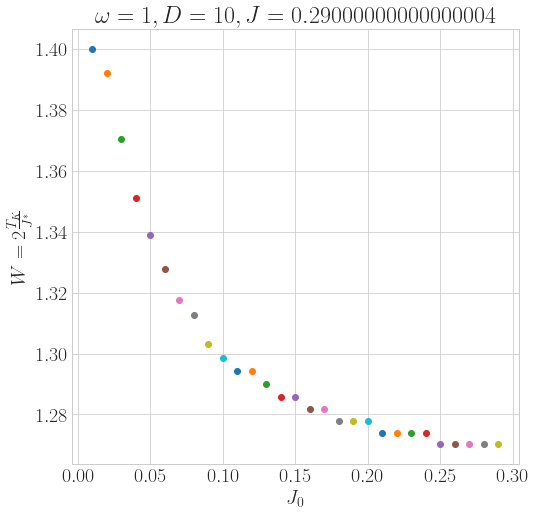

In [57]:
def wilson_num(w,D):
    for J0 in np.arange(0.01,0.3,0.01):
        x, y, z = complete_rg(w, D, J0)
        W = (1/(1 - 2*w/z[-1]))
        plt.scatter(J0, W)
wilson_num(1,10)
plt.xlabel(r"$J_0$")
plt.ylabel(r"$W = 2\frac{T_K}{J^*}$")
plt.show()

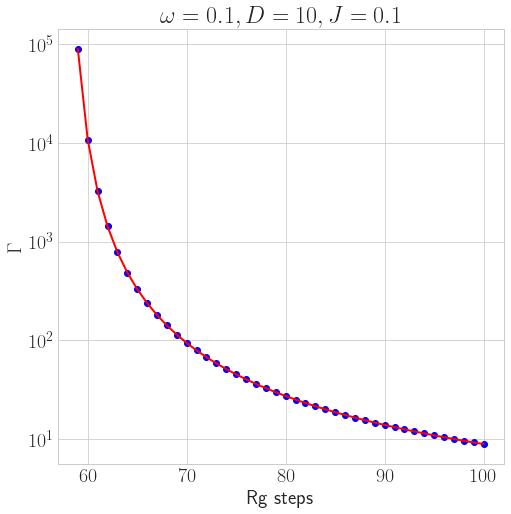

In [66]:
def plot_gamma(w, D0, J):
    x, y, z = [], [], []
    N = 100
    Df = D0/2
    den = w - (D0-Df)/2 + J/4
    count = N
    plt.title(r'$\omega={}, D={}, J={}$'.format(w,Dmax,J))
    for D in np.linspace(D0,Df,N):
        if den * (w - (D0-Df)/2 + J/4) <= 0 or J == 0:
            break
        n = 2*np.pi*N*sqrt(D/Df)
        z.append(n*J**2)
        x.append(count)
        y.append(J)
        den = w - (D0-Df)/2 + J/4
        J = rg(w, D, J, Df, N)
        count -= 1
    plt.plot(x,z, color='r')
    plt.scatter(x,z, color='b', marker="o")
    plt.xlabel(r"Rg steps")
    plt.ylabel(r"$\Gamma$")
    plt.yscale("log")
    plt.show()

plot_gamma(0.1, 20, 0.1)